In [88]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
import numpy as np
import pandas as pd
import seaborn as sb
import pyreadr

In [89]:
data = pyreadr.read_r("./data/data_final.rds")
df = data[None]
type(df)

pandas.core.frame.DataFrame

In [90]:
print(df.columns)

Index(['datetime', 'cfs', 'PRCP', 'TMAX', 'TMIN', 'SNOW', 'TMAX_PRCP',
       'TMIN_PRCP'],
      dtype='object')


In [91]:
df.columns = ['ds', 'y', 'PRCP', 'TMAX', 'TMIN', 'SNOW', 'TMAX_PRCP', 'TMIN_PRCP']
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = np.log(df['y'])
df = df.drop(['TMAX', 'SNOW', 'TMAX_PRCP'], axis=1)
df.head()

,ds,y,PRCP,TMIN,TMIN_PRCP
0,1989-08-01,6.423247,3,139,417
1,1989-08-02,6.419995,0,100,0
2,1989-08-03,6.357842,0,50,0
3,1989-08-04,6.333280,0,50,0
4,1989-08-05,6.306275,0,61,0


<Axes: xlabel='ds', ylabel='y'>

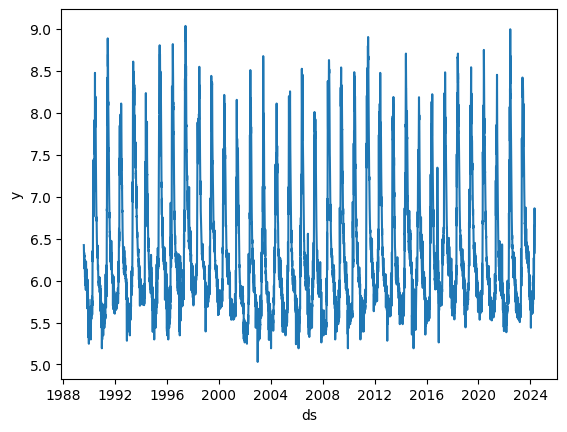

In [92]:
sb.lineplot(data=df, x='ds', y='y')

In [93]:
m = Prophet(seasonality_mode='additive')
m.fit(df)

06:44:17 - cmdstanpy - INFO - Chain [1] start processing
06:44:20 - cmdstanpy - INFO - Chain [1] done processing


In [94]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

/Users/finnvaughankraska/IdeaProjects/timeseries_analysis/.venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/finnvaughankraska/IdeaProjects/timeseries_analysis/.venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


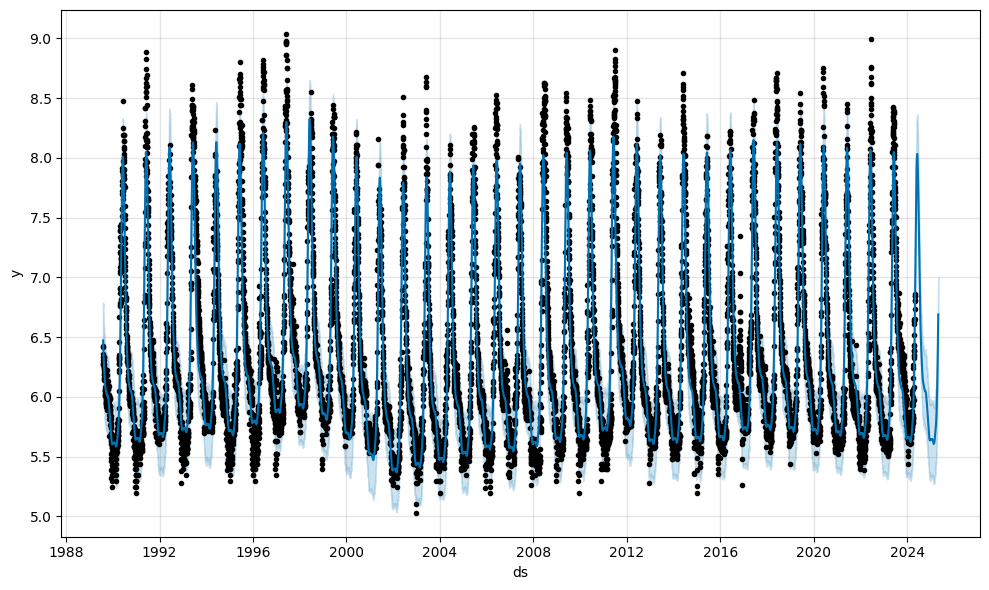

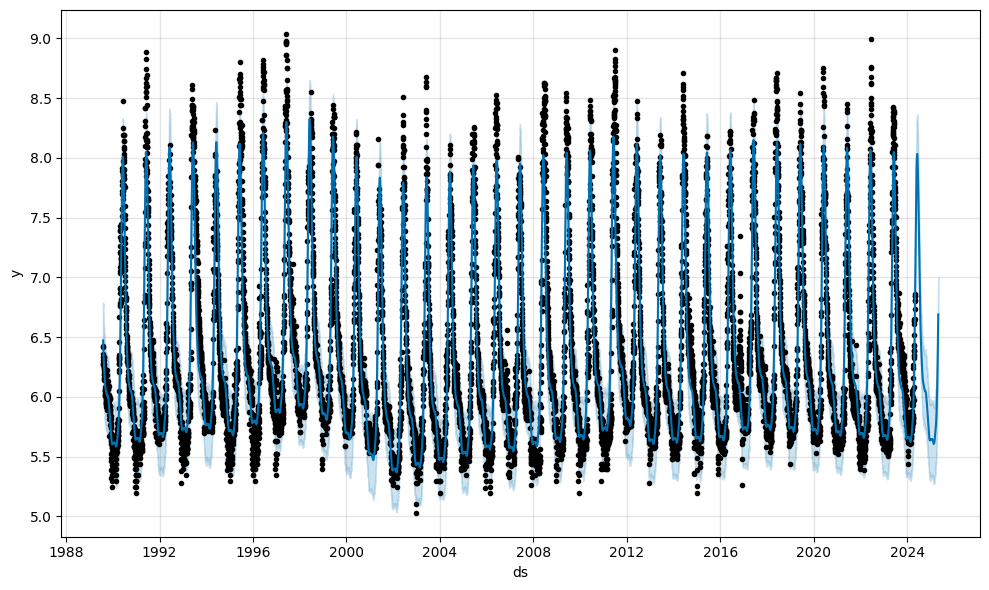

In [95]:
m.plot(forecast)

/Users/finnvaughankraska/IdeaProjects/timeseries_analysis/.venv/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/finnvaughankraska/IdeaProjects/timeseries_analysis/.venv/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/finnvaughankraska/IdeaProjects/timeseries_analysis/.venv/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is de

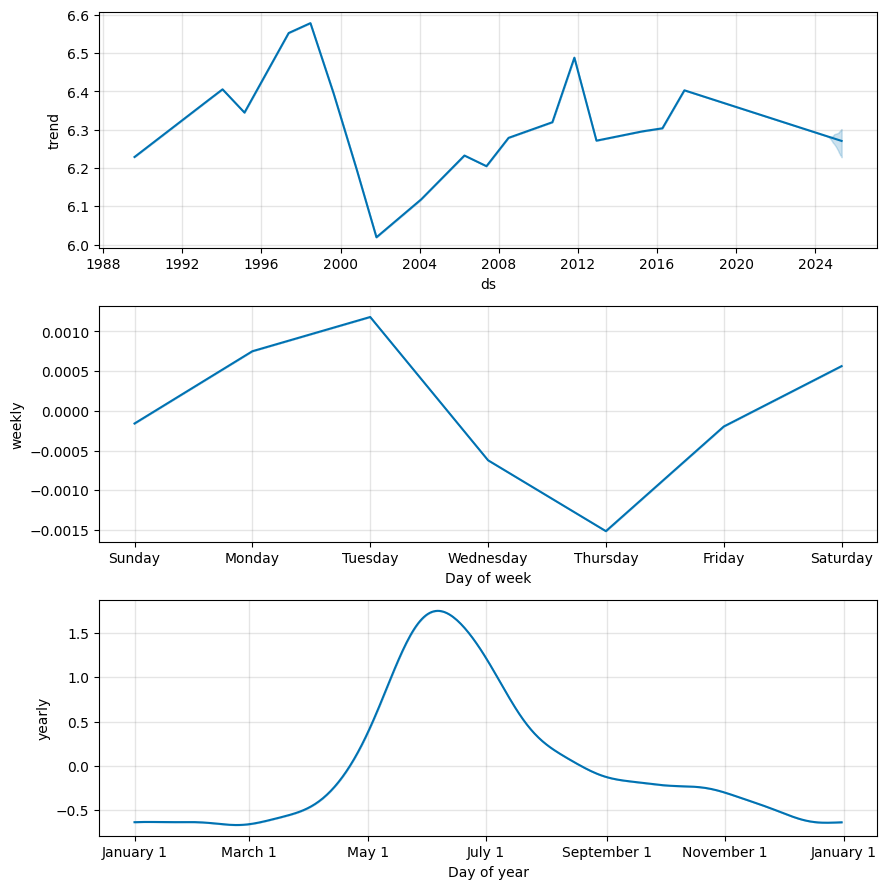

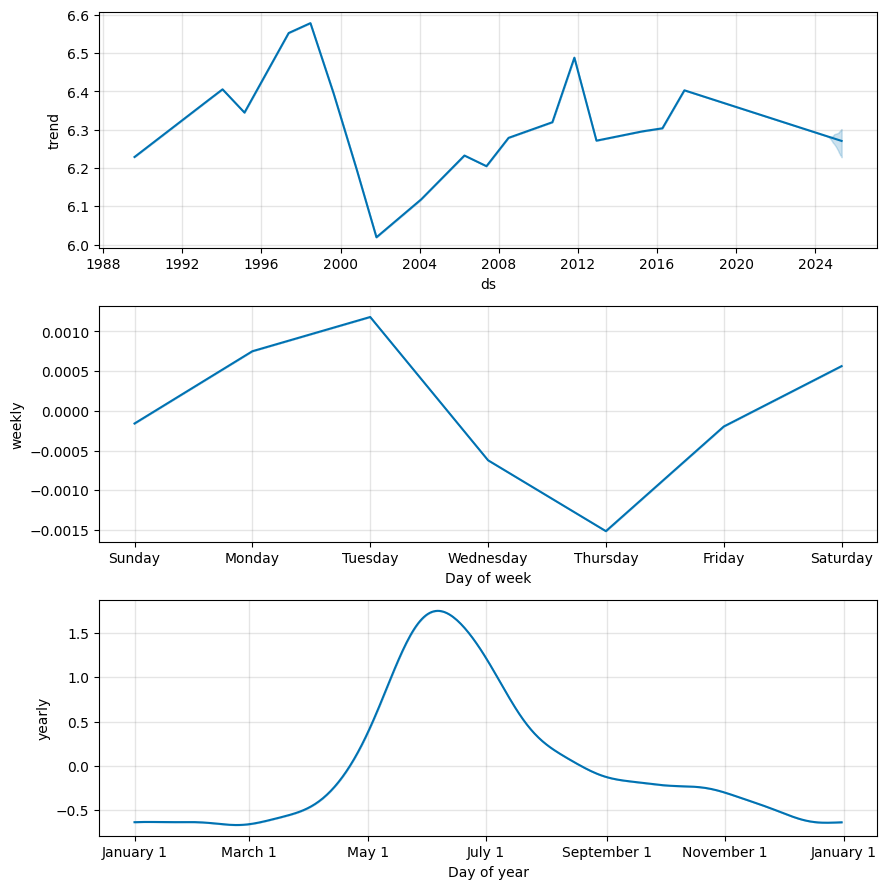

In [96]:
m.plot_components(forecast)

In [76]:
df_cv = cross_validation(
    m, 
    initial=f'{365*10} days',
    period='365 days',
    horizon='365 days',
    parallel='processes',
)
df_cv.head()

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:00:33 - cmdstanpy - INFO - Chain [1] start processing
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
20:00:33 - cmdstanpy - INFO - Chain [1] start processing
20:00:33 - cmdstanpy - INFO - Chain [1] start processing
20:00:33 - cmdstanpy - INFO - Chain [1] start processing
20:00:33 - cmdstanpy - INFO - Chain [1] start processing
20:00:33 - cmdstanpy - INFO - Chain [1] start processing
20:00:33 - cmdstanpy - INFO - Chain [1] start processing
20:00:33 - cmdstanpy - INFO - Chain [1] start processing
20:00:34 - cmdstanpy - INFO - Chain [1] done processing
20:00:34 - cmdstanpy - I

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2000-05-09,7.164886,6.877979,7.437667,7.170120,2000-05-08
1,2000-05-10,7.222095,6.924179,7.507620,7.154615,2000-05-08
2,2000-05-11,7.278386,6.989053,7.569930,7.098376,2000-05-08
3,2000-05-12,7.333299,7.063673,7.613244,7.029973,2000-05-08
4,2000-05-13,7.382001,7.107576,7.683509,6.956545,2000-05-08


In [77]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.168577,0.410581,0.338377,0.044421,0.038075,0.044394,0.510274
1,38 days,0.165159,0.406398,0.334051,0.043691,0.037633,0.043659,0.517123
2,39 days,0.161953,0.402434,0.330244,0.043038,0.037234,0.043003,0.521119
3,40 days,0.159287,0.399108,0.327869,0.042582,0.037080,0.042545,0.523402
4,41 days,0.157573,0.396954,0.326674,0.042278,0.036651,0.042244,0.523973
...,...,...,...,...,...,...,...,...
324,361 days,0.137702,0.371083,0.299830,0.048773,0.042708,0.048709,0.652968
325,362 days,0.142068,0.376919,0.304879,0.049441,0.043524,0.049346,0.642123
326,363 days,0.146219,0.382386,0.309804,0.050071,0.044090,0.049952,0.632420
327,364 days,0.150285,0.387666,0.314754,0.050686,0.044900,0.050544,0.623858


/Users/finnvaughankraska/IdeaProjects/timeseries_analysis/.venv/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/finnvaughankraska/IdeaProjects/timeseries_analysis/.venv/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


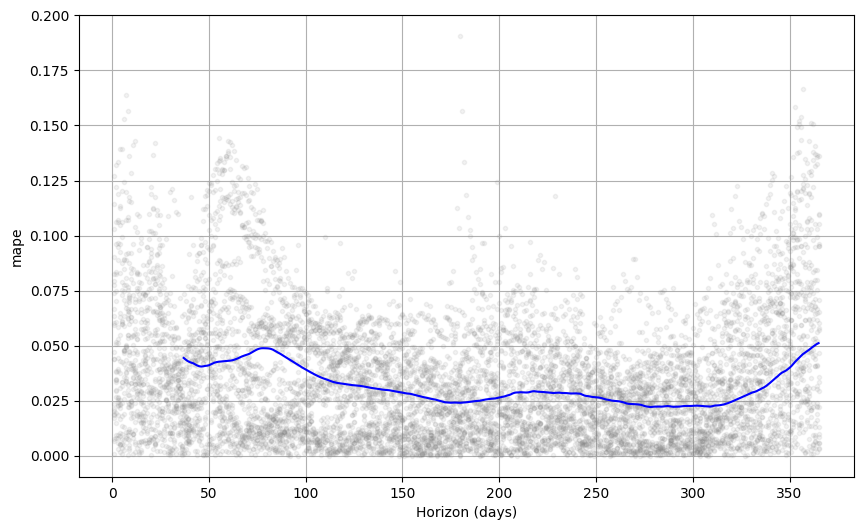

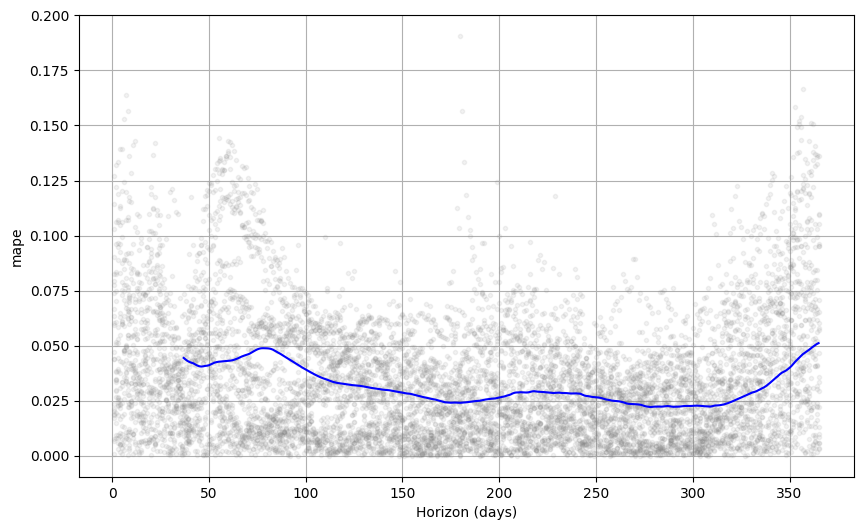

In [79]:
plot_cross_validation_metric(df_cv, metric='mape')

In [146]:
m_r = Prophet()
m_r.add_regressor(name='PRCP')
m_r.add_regressor(name='TMIN')
m_r.fit(df)
dfr_cv = cross_validation(
    m_r, 
    initial=f'{365*10} days',
    period='365 days',
    horizon='365 days',
    parallel='processes',
)

07:07:42 - cmdstanpy - INFO - Chain [1] start processing
07:07:45 - cmdstanpy - INFO - Chain [1] done processing
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
07:07:47 - cmdstanpy - INFO - Chain [1] start processing
Importing plotly failed. Interactive plots will not work.
07:07:47 - cmdstanpy - INFO - Chain [1] start processing
07:07:47 - cmdstanpy - INFO - Chain [1] start processing
07:07:47 - cmdstanpy - INFO - Chain [1] start processing
07:07:47 - cmdstanpy - INFO - Chain [1] start processing
07:07:47 - cmdstanpy - INFO - Chain [1] start processing
07:07:47 - cmdstanpy - INFO - Chain [1] start processing
07:07:47 - cmdstanpy - I

/Users/finnvaughankraska/IdeaProjects/timeseries_analysis/.venv/lib/python3.11/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/finnvaughankraska/IdeaProjects/timeseries_analysis/.venv/lib/python3.11/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


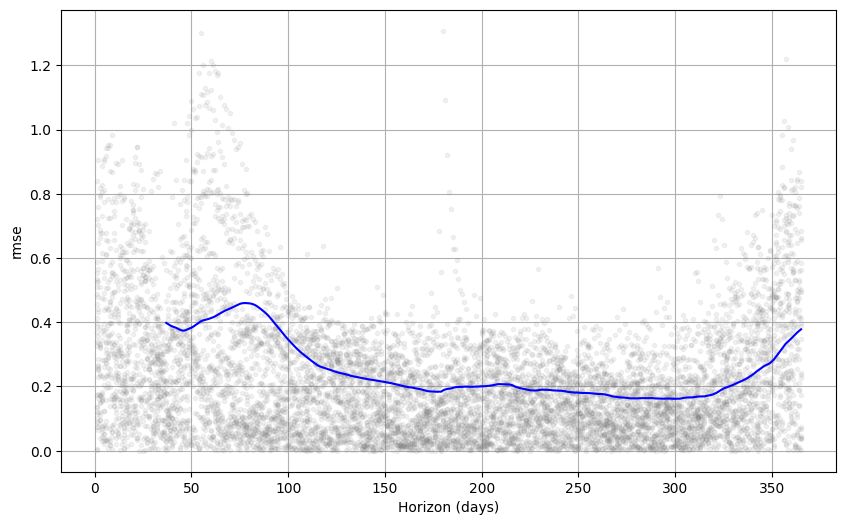

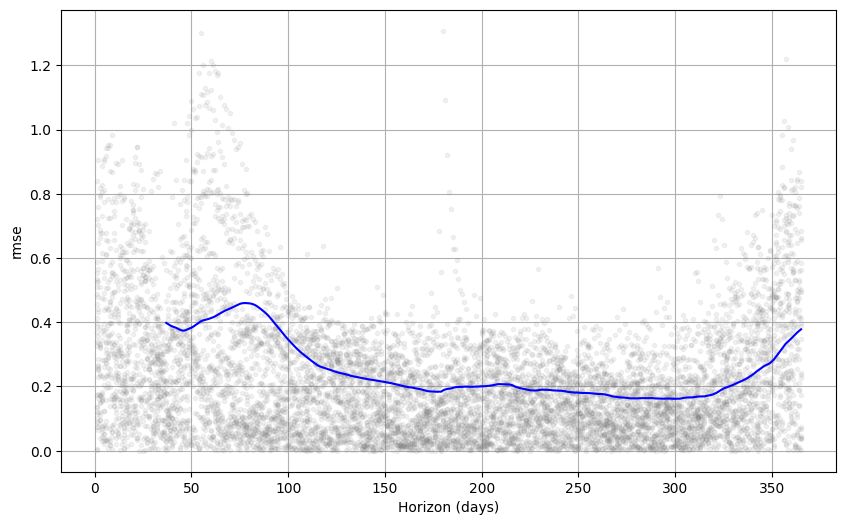

In [157]:
plot_cross_validation_metric(dfr_cv, metric='rmse')

In [154]:
dfr_metrics = performance_metrics(dfr_cv)
print(np.mean(dfr_metrics['rmse']))
dfr_metrics.mean()

0.2499195759334995


horizon     201 days 00:00:00
mse                  0.070885
rmse                  0.24992
mae                  0.199711
mape                 0.031485
mdape                0.027273
smape                0.031455
coverage             0.785305
dtype: object

<Axes: ylabel='mae'>

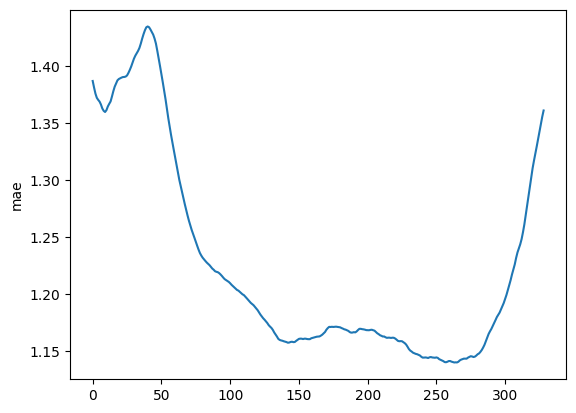

In [156]:
sb.lineplot(data=np.exp(dfr_metrics[['mse', 'mae', 'mape']]), 
            x=range(0, 329),
            y='mae')